# ITER use case

In [1]:
using Revise
using FUSE
using Plots; gr();
FUSE.logging(Logging.Info);

### Initialize `dd`, `ini`, `act` from ITER use case

In [9]:
ini, act = FUSE.case_parameters(:ITER, init_from=:ods);

ini.ic_antennas.power_launched = 0.0
ini.nbi.power_launched = 3.0e7
ini.equilibrium.B0 = 5.3
ini.equilibrium.ip = 15.0

ini


FUSE.ParametersInits{Float64}
├─ general
│  ├─ casename ➡ "ITER_scalars" Mnemonic name of the case being run
│  └─ init_from ➡ :scalars Initialize run from [:ods, :scalars]
├─ gasc
│  ├─ filename ➡ missing Output GASC .json file from which data will be loaded
│  └─ case ➡ missing Number of the GASC run to load
├─ ods
│  └─ filename ➡ missing ODS.json file from which equilibrium is loaded
├─ build
│  ├─ layers ➡ OrderedCollections.OrderedDict{Symbol, Float64}(
│  │           :gap_OH => 0.8
│  │           :OH => 1.3
│  │           :hfs_TF => 1.1
│  │           :hfs_vacuum_vessel => 0.3
│  │           :hfs_shield => 0.4
│  │           :hfs_wall => 0.1
│  │           :plasma => 4.4
│  │           :lfs_wall => 0.1
│  │           :lfs_shield => 0.4
│  │           :lfs_vacuum_vessel => 1.05
│  │           :lfs_TF => 1.1
│  │           :gap_cryostat => 2.34
│  │           :cryostat => 0.3) [m] Sorted dictionary of layers thicknesses in radial build
│  ├─ blanket ➡ 0.0 Fraction of blanket in ra

In [10]:
dd = FUSE.init(ini, act, do_plot=false);

LoadError: Flux surface at ψ=8.025227304170343e-5 is not closed

In [ ]:
act

In [6]:
FUSE.ActorEquilibriumTransport(dd, act);

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 6.19 [m]                  B0 → -5.06 [T]                 Te0 → 23.2 [keV]               ne0 → 1.31e+20 [m⁻³]           
a → 2 [m]                      ip → 15.1 [MA]                 Ti0 → 23.2 [keV]               ne_ped → 8.28e+19 [m⁻³]        
1/ϵ → 3.09 [m]                 q95 → -3.07                    <Te> → 9.85 [keV]              <ne> → 9.93e+19 [m⁻³]          
κ → 1.84                       <Bpol> → 1.02 [T]              <Ti> → 9.85 [keV]              ne0/<ne> → 1.32                
δ → 0.427                      βpol → 1.26                    Te0/<Te> → 2.36                fGW → 0.918                    
ζ → -0.102                     βtor → 0.0537                  Ti0/<Ti> → 2.36                zeff_ped → 2                   


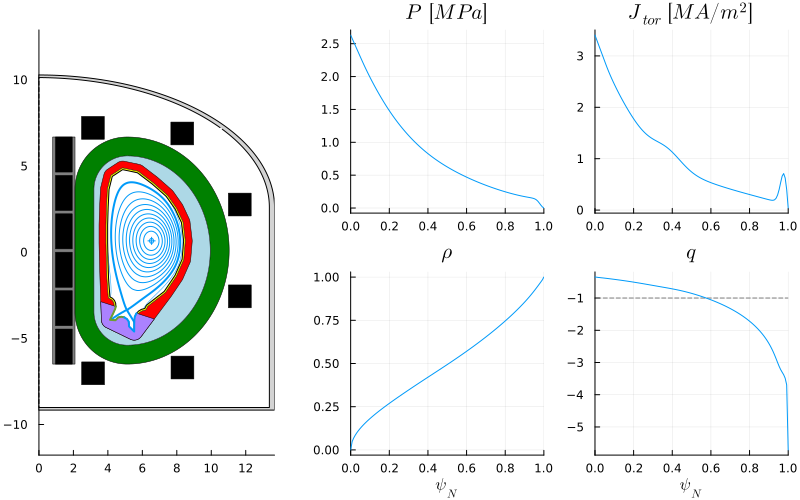

​


13×9 DataFrame
 Row │ group   details  type      ΔR         R_start   R_end     material   area       volume    
     │ String  String   String    Float64    Float64   Float64   String     Float64    Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                         0.79759     0.0       0.79759              10.5097     26.3341
   2 │ in               oh        1.29608     0.79759   2.09367  Nb3Sn       17.0782    155.124
   3 │ hfs              tf        1.09669     2.09367   3.19036  Nb3Sn       36.0217    722.076
   4 │ hfs     vacuum   vessel    0.299096    3.19036   3.48945  Water       18.6541    826.798
   5 │ hfs              shield    0.398795    3.48945   3.88825  Steel       11.2164    405.379
   6 │ hfs              wall      0.0996987   3.88825   3.98795  Tungsten     2.37585    85.5401
   7 │ lhfs             plasma    4.4084      3.98795   8.39634  DT_plasma   28.9466   1072.59
   8 │ lfs        

​


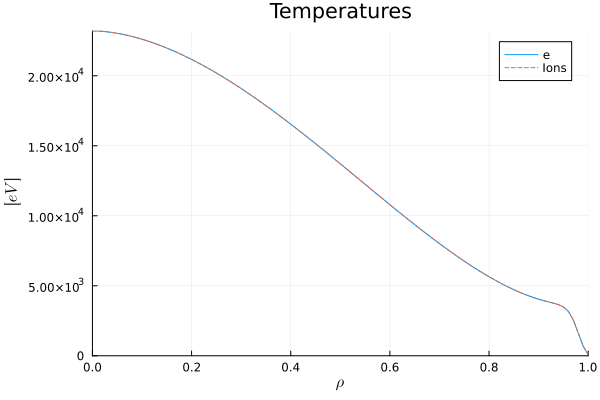

​


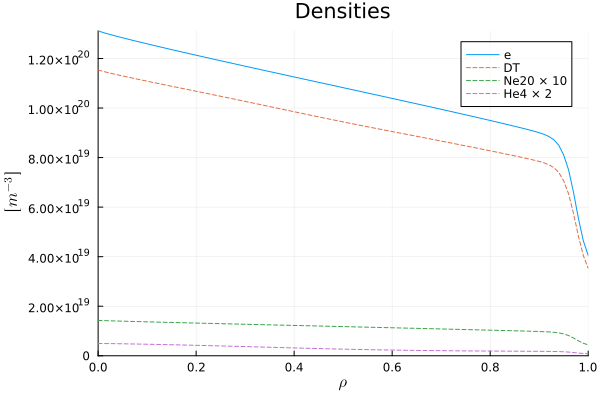

​


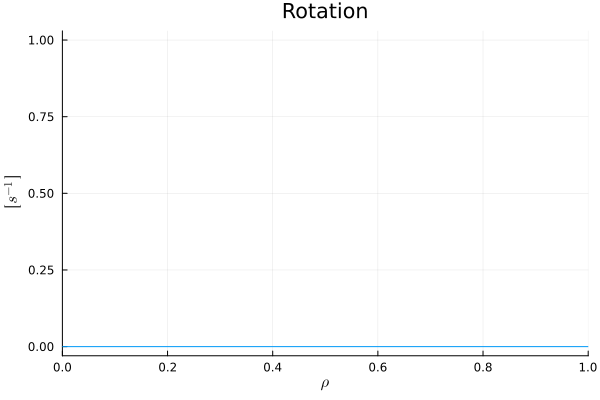

​


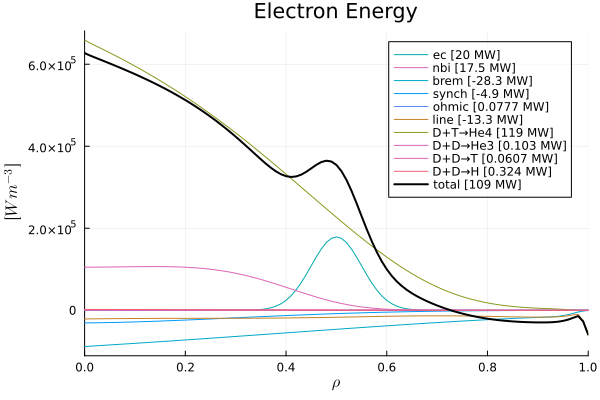

​


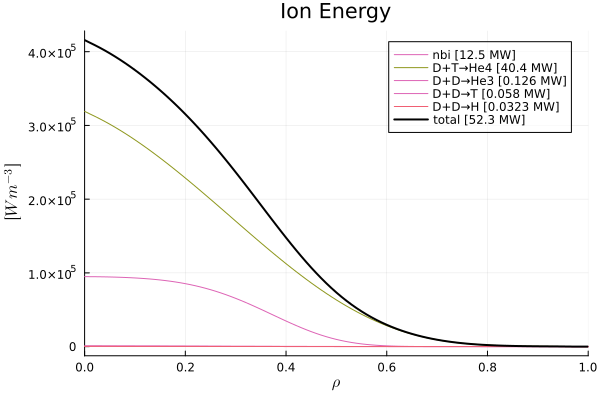

​


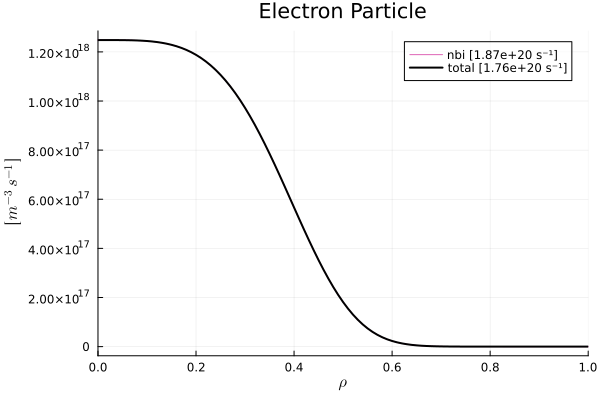

​


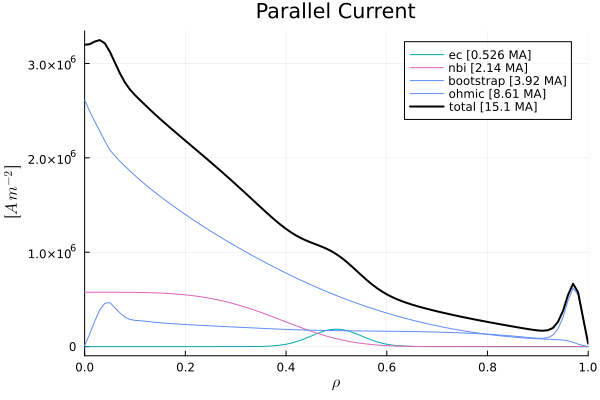

In [7]:
FUSE.digest(dd)

In [ ]:
act.ActorHFSsizing.do_plot = false
act.ActorHFSsizing.verbose = false

act.ActorEquilibriumTransport.max_iter = 8
act.ActorEquilibriumTransport.convergence_error = 5e-2
act.ActorEquilibriumTransport.do_plot = false
act.ActorTauenn.transport_model = :ds03
act.ActorTauenn.confinement_factor = 0.90
act.ActorTauenn.T_shaping = 2.5
act.ActorTauenn.T_ratio_pedestal = 0.825
act.ActorTauenn.error = 1e-3
act.ActorTauenn.eped_only_powerlaw = true # more reliable for broader exploration

act.ActorPFcoilsOpt.do_plot = false
act.ActorPFcoilsOpt.symmetric = true
act.ActorPFcoilsOpt.update_equilibrium = false
act.ActorPFcoilsOpt.optimization_scheme = :none

act.ActorPowerNeeds.model = :thermal_power_fraction
act.ActorPowerNeeds.thermal_power_fraction = 0.2

act.ActorThermalCycle.power_cycle_type = :fixed_cycle_efficiency
act.ActorThermalCycle.fixed_cycle_efficiency = 0.4

act.ActorStabilityLimits.raise_on_breach = false
act.ActorStabilityLimits.models = [:beta_troyon_1984, :model_201, :model_401] # include βn check

act.ActorCosting.model = :Sheffield
act.ActorCosting.production_increase = 10.0
act.ActorCosting.learning_rate = 0.616

In [ ]:
FUSE.ActorWholeFacility(dd, act);